# Chapter 7 - Distributional Q-learning

In [1]:
import numpy as np
probs = np.array([0.6, 0.1, 0.1, 0.1, 0.1])
outcomes = np.array([18, 21, 17, 17, 21])
expected_value = 0.0
for i in range(probs.shape[0]):
    expected_value += probs[i] * outcomes[i]

print(expected_value)

18.4


In [2]:
expected_value = probs @ outcomes
print(expected_value)

18.4


In [3]:
t0 = 18.4
T = lambda: t0 + np.random.randn(1)
T()

array([17.93141484])

##### Listing 7.1

In [1]:
# matplotlib 오류를 해결하기 위해 임의로 추가함
# 이거때문에 2시간은 날렸네... 
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

vmin,vmax = -10.,10. #A  support의 최대 최소
nsup=51 #B support의 크기 
support = np.linspace(vmin,vmax,nsup) #C
probs = np.ones(nsup)
probs /= probs.sum()
z3 = torch.from_numpy(probs).float()
# plt.bar(support,probs) #D

In [2]:
print(support, probs)

[-10.   -9.6  -9.2  -8.8  -8.4  -8.   -7.6  -7.2  -6.8  -6.4  -6.   -5.6
  -5.2  -4.8  -4.4  -4.   -3.6  -3.2  -2.8  -2.4  -2.   -1.6  -1.2  -0.8
  -0.4   0.    0.4   0.8   1.2   1.6   2.    2.4   2.8   3.2   3.6   4.
   4.4   4.8   5.2   5.6   6.    6.4   6.8   7.2   7.6   8.    8.4   8.8
   9.2   9.6  10. ] [0.01960784 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784
 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784
 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784
 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784
 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784
 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784
 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784
 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784 0.01960784
 0.01960784 0.01960784 0.01960784]


<BarContainer object of 51 artists>

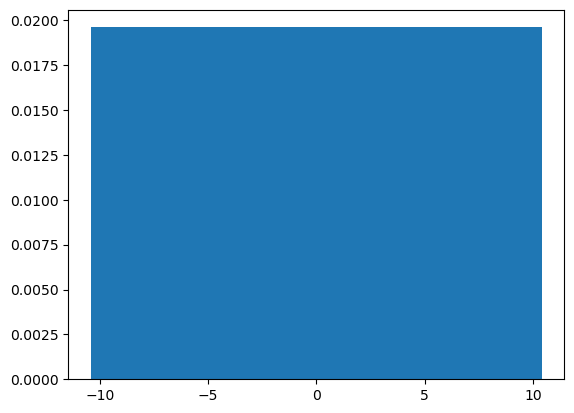

In [3]:
plt.bar(support, probs)

##### Listing 7.2

In [5]:
# r: 얻은 보상 
# probs: 원래의 확률 분포 
# lim: value의 범위 
# gamma: 1에 가까울 수록 많이 변화 
def update_dist(r,support,probs,lim=(-10.,10.),gamma=0.8):
    nsup = probs.shape[0]
    vmin,vmax = lim[0],lim[1]
    dz = (vmax-vmin)/(nsup-1.) #A  원소 사이의 간격 
    bj = np.round((r-vmin)/dz) #B support 성분의 index 
    bj = int(np.clip(bj,0,nsup-1)) #C bj를 0,nsup-1을 포함하는 구간의 정수로 만든다 

    m = probs.clone()
    
    j = 1
    for i in range(bj,1,-1): #D
        m[i] += np.power(gamma,j) * m[i-1]
        j += 1
    j = 1
    for i in range(bj,nsup-1,1): #E
        m[i] += np.power(gamma,j) * m[i+1]
        j += 1
    m /= m.sum() #F
    return m

In [6]:
probs

array([0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784])

##### Listing 7.3

<BarContainer object of 51 artists>

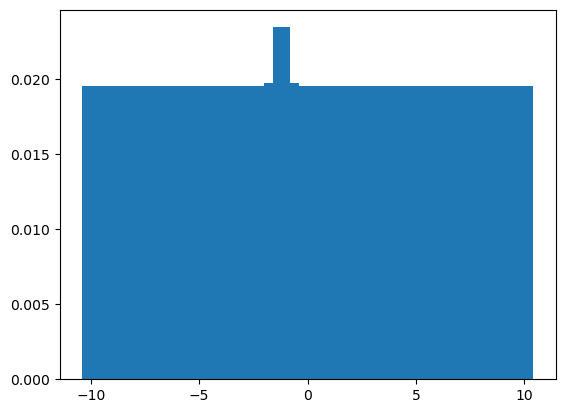

In [7]:
ob_reward = -1
Z = torch.from_numpy(probs).float()
Z = update_dist(ob_reward,torch.from_numpy(support).float(),Z,lim=(vmin,vmax),gamma=0.1)
plt.bar(support,Z)
# ob_reward 쪽으로 약간 반영된 것을 알 수 있다 

##### Listing 7.5

<BarContainer object of 51 artists>

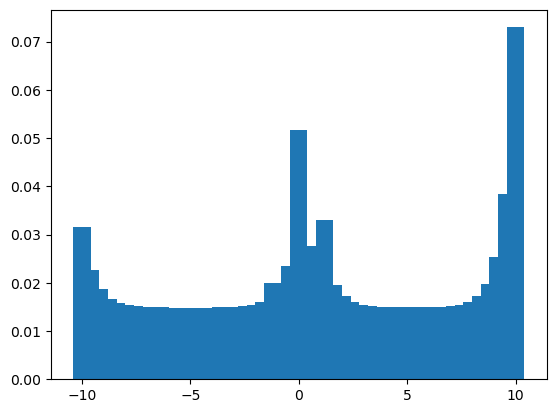

In [8]:
ob_rewards = [10,10,10,0,1,0,-10,-10,10,10]
for i in range(len(ob_rewards)):
    Z = update_dist(ob_rewards[i], torch.from_numpy(support).float(), Z, lim=(vmin,vmax), gamma=0.5)
plt.bar(support, Z)
# 보상을 받은 10, 1, 0 ,-10에 모여있는 걸 볼 수 있다 

##### Listing 7.5

<BarContainer object of 51 artists>

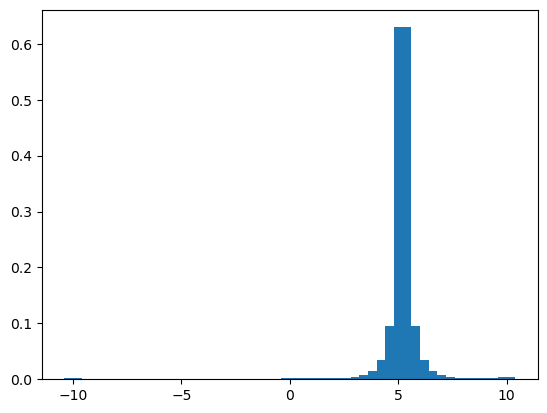

In [9]:
ob_rewards = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
for i in range(len(ob_rewards)):
    Z = update_dist(ob_rewards[i], torch.from_numpy(support).float(), \
    Z, lim=(vmin,vmax), gamma=0.7)
plt.bar(support, Z)

##### Listing 7.6

In [10]:
# aspace: action의 개수
# x: state vector
# theta: neural net parameter vector 
def dist_dqn(x,theta,aspace=3): #A
    dim0,dim1,dim2,dim3 = 128,100,25,51 #B
    t1 = dim0*dim1
    t2 = dim2*dim1
    # theta의 모양을 잡아줌 
    theta1 = theta[0:t1].reshape(dim0,dim1) #C
    theta2 = theta[t1:t1 + t2].reshape(dim1,dim2)
    # (B*100) = (B*128) @ (128*100)
    l1 = x @ theta1 #D
    l1 = torch.selu(l1)
    # (B*25) = (B*100) @ (100*25)
    l2 = l1 @ theta2 #E
    l2 = torch.selu(l2)

    l3 = []
    for i in range(aspace): #F
        step = dim2*dim3
        theta5_dim = t1 + t2 + i * step  # 1층+2층+ i*3층
        theta5 = theta[theta5_dim:theta5_dim+step].reshape(dim2,dim3)
        # (B*51) = (B*25) @ (25*51)
        l3_ = l2 @ theta5 #G
        l3.append(l3_)
    l3 = torch.stack(l3,dim=1) #H  (B*3*51)
    l3 = torch.nn.functional.softmax(l3,dim=2)

    return l3.squeeze()  # 차원이 1인 것 제거 ex) (1,3,51) -> (3,51)

##### Listing 7.7

In [13]:
def get_target_dist(dist_batch,action_batch,reward_batch,support,lim=(-10,10),gamma=0.8):
    nsup = support.shape[0]
    vmin,vmax = lim[0],lim[1]
    dz = (vmax-vmin)/(nsup-1.)
    target_dist_batch = dist_batch.clone()
    # 배치 크기만큼 반복 
    for i in range(dist_batch.shape[0]): #A
        dist_full = dist_batch[i]
        action = int(action_batch[i].item())
        dist = dist_full[action]
        r = reward_batch[i]
        if r != -1: #B  종료 상태이므로 관측된 보상이 곧 기대 보상, 목표 분포는 퇴화 분포가 됨 
            target_dist = torch.zeros(nsup)  # 나머지는 0 
            bj = np.round((r-vmin)/dz)
            bj = int(np.clip(bj,0,nsup-1))
            target_dist[bj] = 1.  # 해당하는 곳에 확률 1 
        else: #C
            target_dist = update_dist(r,support,dist,lim=lim,gamma=gamma)
        # 해당하는 곳에 업데이트 
        target_dist_batch[i,action,:] = target_dist #D
        
    return target_dist_batch

##### Listing 7.8

In [11]:
# 교차 엔트로피 오차 
def lossfn(x,y):#A
    loss = torch.Tensor([0.])
    loss.requires_grad=True
    for i in range(x.shape[0]): #B 배치별로 나눈다 
        # 가중합 대신 내적으로 한번에 구하기 
        loss_ = -1 *  torch.log(x[i].flatten(start_dim=0)) @ y[i].flatten(start_dim=0) #C
        loss = loss + loss_
    return loss

##### Listing 7.9

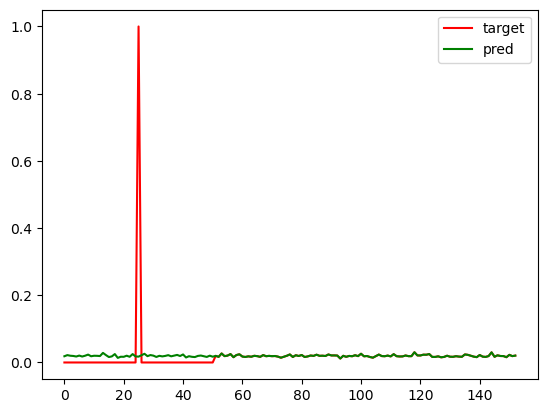

In [36]:
aspace = 3 #A
tot_params = 128*100 + 25*100 + aspace*25*51 #B
theta = torch.randn(tot_params)/10. #C  초기화 
theta.requires_grad=True
# target net을 위해 복사본 생성 
theta_2 = theta.detach().clone() #D
#
vmin,vmax= -10,10
gamma=0.9
lr = 0.00001
update_rate = 75 #E  target net을 동기화할 간격 
support = torch.linspace(-10,10,51)
# test용 두개짜리 임의의 데이터를 만들자 
state = torch.randn(2,128)/10. #F
action_batch = torch.Tensor([0,2]) #G
reward_batch = torch.Tensor([0,10]) #H

losses = [] 
pred_batch = dist_dqn(state,theta,aspace=aspace) #I
target_dist = get_target_dist(pred_batch,action_batch,reward_batch, \
                                 support, lim=(vmin,vmax),gamma=gamma) #J

plt.plot((target_dist.flatten(start_dim=1)[0].data.numpy()),color='red',label='target')
plt.plot((pred_batch.flatten(start_dim=1)[0].data.numpy()),color='green',label='pred')
plt.legend()
# 벡터 3개를 동시에 plot했기 때문에 3등분으로 확인하면 됨 
# 왼쪽은 0

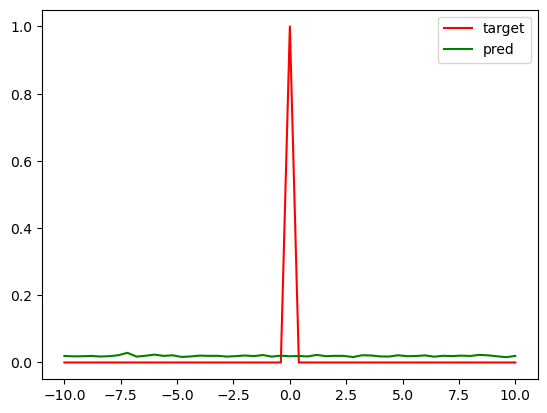

In [19]:
plt.plot(torch.linspace(-10,10,51),(target_dist.flatten(start_dim=1)[0][:51].data.numpy()),color='red',label='target')
plt.plot(torch.linspace(-10,10,51),(pred_batch.flatten(start_dim=1)[0][:51].data.numpy()),color='green',label='pred')
plt.legend()
# t=0일때 a=0에서 reward=0 일 확률이 높음을 알려줌

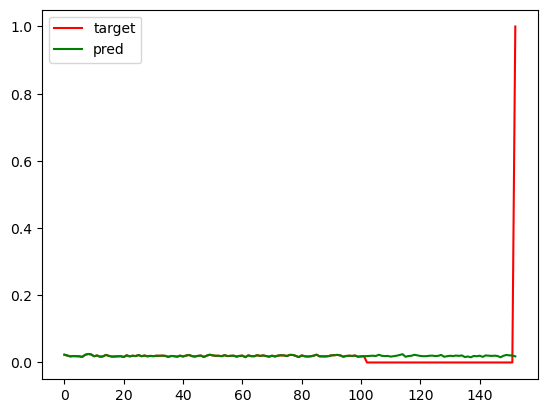

In [22]:
plt.plot((target_dist.flatten(start_dim=1)[1].data.numpy()),color='red',label='target')
plt.plot((pred_batch.flatten(start_dim=1)[1].data.numpy()),color='green',label='pred')
plt.legend()
# t=1일때 a=2에서 reward=10 일 확률이 높음을 알려줌

##### Listing 7.10

[]

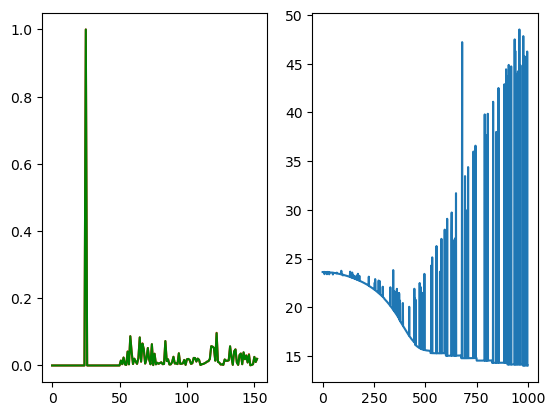

In [37]:
for i in range(1000):
    reward_batch = torch.Tensor([0,8]) + torch.randn(2)/10.0 #A noise 추가 
    pred_batch = dist_dqn(state,theta,aspace=aspace) #B
    pred_batch2 = dist_dqn(state,theta_2,aspace=aspace) #C
    target_dist = get_target_dist(pred_batch2,action_batch,reward_batch, \
                                 support, lim=(vmin,vmax),gamma=gamma) #D
    loss = lossfn(pred_batch,target_dist.detach()) #E
    losses.append(loss.item())
    loss.backward()
    # Gradient Descent
    with torch.no_grad():
        theta -= lr * theta.grad
    theta.requires_grad = True
    
    if i % update_rate == 0: #F 
        theta_2 = theta.detach().clone()
fig,ax = plt.subplots(1,2)
ax[0].plot((target_dist.flatten(start_dim=1)[0].data.numpy()),color='red',label='target')
ax[0].plot((pred_batch.flatten(start_dim=1)[0].data.numpy()),color='green',label='pred')
ax[1].plot(losses)
plt.plot()
# target과 predict가 거의 비슷한 걸 볼 수 있다 
# target net을 복사할 때마다 loss가 급등한다 

##### Listing 7.11

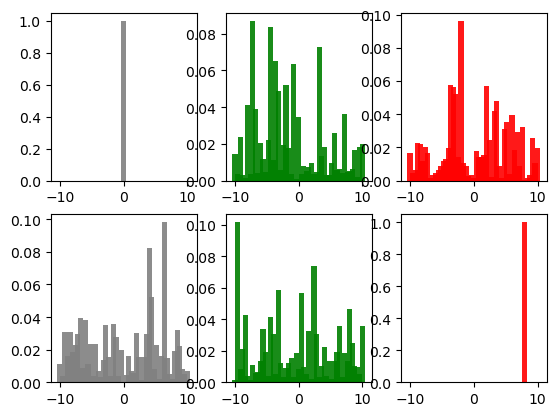

In [38]:
tpred = pred_batch
cs = ['gray','green','red']
num_batch = 2
labels = ['Action {}'.format(i,) for i in range(aspace)]
fig,ax = plt.subplots(nrows=num_batch,ncols=aspace)

for j in range(num_batch): #A 
    for i in range(tpred.shape[1]): #B
        ax[j,i].bar(support.data.numpy(),tpred[j,i,:].data.numpy(),\
                label='Action {}'.format(i),alpha=0.9,color=cs[i])

# 시간과 action에 따라 학습이 잘 된 것을 볼 수 있음 

##### Listing 7.12

In [39]:
# Gym에서 사용하기 위해 필요한 함수들 
# 0~255 사이 값으로 이루어진 numpy -> 0~1 사이의 torch tensor
def preproc_state(state):
    p_state = torch.from_numpy(state).unsqueeze(dim=0).float()
    p_state = torch.nn.functional.normalize(p_state,dim=1) #A
    return p_state

# 끼댓값을 이용해서 동작 선택
def get_action(dist,support):
    actions = []
    for b in range(dist.shape[0]): #B
        expectations = [support @ dist[b,a,:] for a in range(dist.shape[1])] #C
        action = int(np.argmax(expectations)) #D
        actions.append(action)
    actions = torch.Tensor(actions).int()
    return actions

##### Listing 7.13

In [58]:
# 이 아래는 어떤 수를 써도 작동이 안되어 보류 

import gym
from collections import deque
env = gym.make('ALE/Freeway-ram-v0')
aspace = 3
env.env.get_action_meanings()

vmin,vmax = -10,10
replay_size = 200
batch_size = 50
nsup = 51
dz = (vmax - vmin) / (nsup-1)
support = torch.linspace(vmin,vmax,nsup)

replay = deque(maxlen=replay_size) #A
lr = 0.0001 #B 
gamma = 0.1 #C 
epochs = 1300
eps = 0.20 #D starting epsilon for epsilon-greedy policy
eps_min = 0.05 #E ending epsilon
priority_level = 5 #F   우선순위 경험 재현 기법을 위한 중요 경험 복사본 개수 
update_freq = 25 #G 

#Initialize DQN parameter vector
tot_params = 128*100 + 25*100 + aspace*25*51  #H 
theta = torch.randn(tot_params)/10. #I 
theta.requires_grad=True
theta_2 = theta.detach().clone() #J 

losses = []
cum_rewards = [] #K 
renders = []
state = preproc_state(env.reset())

NamespaceNotFound: Namespace ALE not found. Have you installed the proper package for ALE?

##### Listing 7.14

In [ ]:
from random import shuffle
for i in range(epochs):
    pred = dist_dqn(state,theta,aspace=aspace)
    if i < replay_size or np.random.rand(1) < eps: #A
        action = np.random.randint(aspace)
    else:
        action = get_action(pred.unsqueeze(dim=0).detach(),support).item()
    state2, reward, done, info = env.step(action) #B
    state2 = preproc_state(state2)
    if reward == 1: cum_rewards.append(1) 
    reward = 10 if reward == 1 else reward #C
    reward = -10 if done else reward #D
    reward = -1 if reward == 0 else reward #E
    exp = (state,action,reward,state2) #F
    replay.append(exp) #G
    
    if reward == 10: #H
        for e in range(priority_level):
            replay.append(exp)
            
    shuffle(replay)
    state = state2

    if len(replay) == replay_size: #I
        indx = np.random.randint(low=0,high=len(replay),size=batch_size)
        exps = [replay[j] for j in indx]
        state_batch = torch.stack([ex[0] for ex in exps],dim=1).squeeze()
        action_batch = torch.Tensor([ex[1] for ex in exps])
        reward_batch = torch.Tensor([ex[2] for ex in exps])
        state2_batch = torch.stack([ex[3] for ex in exps],dim=1).squeeze()
        pred_batch = dist_dqn(state_batch.detach(),theta,aspace=aspace)
        pred2_batch = dist_dqn(state2_batch.detach(),theta_2,aspace=aspace)
        target_dist = get_target_dist(pred2_batch,action_batch,reward_batch, \
                                     support, lim=(vmin,vmax),gamma=gamma)
        loss = lossfn(pred_batch,target_dist.detach())
        losses.append(loss.item())
        loss.backward()
        with torch.no_grad(): #J
            theta -= lr * theta.grad
        theta.requires_grad = True
        
    if i % update_freq == 0: #K
        theta_2 = theta.detach().clone()
        
    if i > 100 and eps > eps_min: #L
        dec = 1./np.log2(i)
        dec /= 1e3
        eps -= dec
    
    if done: #M
        state = preproc_state(env.reset())
        done = False

In [ ]:
plt.plot(losses)